In [68]:
import sqlite3
import pandas as pd
import numpy as np

conn = sqlite3.connect("../data/lotto_max.db")

df = pd.read_sql("""
SELECT draw_date, n1, n2, n3, n4, n5, n6, n7
FROM draws
ORDER BY draw_date
""", conn)

conn.close()

df["draw_date"] = pd.to_datetime(df["draw_date"])
df.head()


,draw_date,n1,n2,n3,n4,n5,n6,n7
0,2009-09-25,5,17,19,25,31,38,46
1,2009-10-02,8,27,28,29,31,32,35
2,2009-10-09,5,15,25,38,42,46,47
3,2009-10-16,4,10,18,20,31,35,44
4,2009-10-23,4,7,10,12,23,25,36


In [69]:
numbers_long = (
    df
    .melt(id_vars="draw_date", value_name="number")
    .dropna()[["draw_date", "number"]]
)

numbers_long["hit"] = 1
numbers_long.head()


,draw_date,number,hit
0,2009-09-25,5,1
1,2009-10-02,8,1
2,2009-10-09,5,1
3,2009-10-16,4,1
4,2009-10-23,4,1


In [70]:
total_draws = df.shape[0]
expected = total_draws * 7 / 50

freq_all = (
    numbers_long
    .groupby("number")
    .size()
    .reset_index(name="freq_all")
)

freq_all["z_score"] = (
    freq_all["freq_all"] - expected
) / freq_all["freq_all"].std()

freq_all.sort_values("freq_all", ascending=False).head(10)

,number,freq_all,z_score
18,19,197,1.836696
27,28,194,1.645771
6,7,193,1.582129
38,39,190,1.391205
1,2,188,1.263922
29,30,184,1.009355
35,36,184,1.009355
21,22,183,0.945714
37,38,181,0.818431
23,24,180,0.754789


In [71]:
numbers_long = numbers_long.sort_values("draw_date")

numbers_long["rolling_10"] = (
    numbers_long
    .groupby("number")["hit"]
    .rolling(10, min_periods=1)
    .sum()
    .reset_index(0, drop=True)
)

numbers_long["rolling_20"] = (
    numbers_long
    .groupby("number")["hit"]
    .rolling(20, min_periods=1)
    .sum()
    .reset_index(0, drop=True)
)


In [72]:
numbers_long["gap"] = (
    numbers_long
    .groupby("number")["draw_date"]
    .diff()
    .dt.days
    .fillna(999)
)

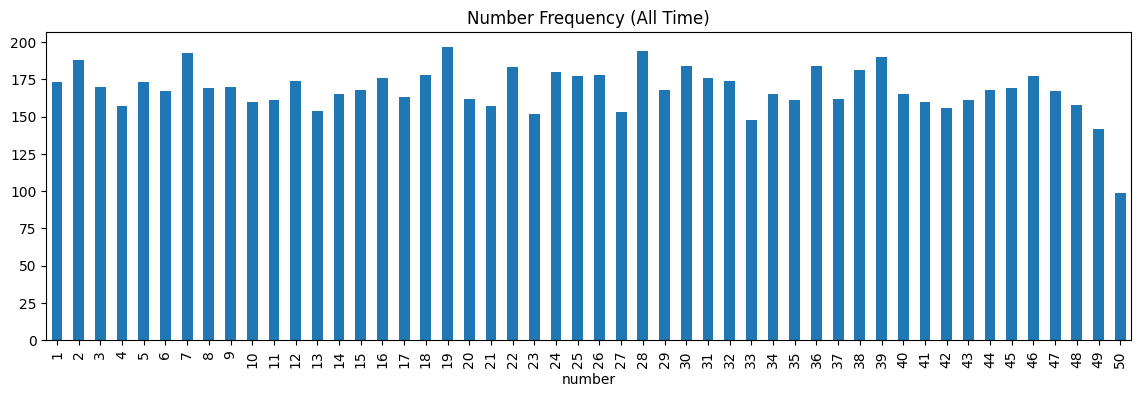

In [73]:
import matplotlib.pyplot as plt

freq_all.set_index("number")["freq_all"].plot(kind="bar", figsize=(14,4))
plt.title("Number Frequency (All Time)")
plt.show()